In [1]:
pip install aerosandbox

In [2]:
import aerosandbox as asb
import aerosandbox.numpy as np
import matplotlib.pyplot as plt
import aerosandbox.tools.pretty_plots as p
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import glob

In [5]:
#VIEWING THE INFORMATION FROM .dat FILE

# dat_file_path = R"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\new\fx63137-il.dat"
# with open(dat_file_path, "r") as file:
#     lines = file.readlines()
    
# print(lines)

In [6]:
#PLOTTING AN AIRFOIL USING .dat FILE

# filename = (r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\new\fx63137sm-il.dat") #enter your file path here
# #filename= "a18-il.dat"
# data = pd.read_table(filename,delim_whitespace=True,skiprows=[0],names=['x','y'],index_col=False)

# #Plot
# plt.plot(data.x, data.y, 'r',marker='.',markeredgecolor='black', markersize=3)
# plt.plot(0.5*data.x+0.3,0.5*data.y) #Scale & translate the datapoints

# #Plot settings
# plt.axis('equal')
# plt.xlim((-0.05, 1.05))
# plt.legend(['FX63_137 AIRFOIL','SCALED AIRFOIL'])

In [7]:
#READING & PLOTTING AN AIRFOIL USING .dat FILE

filename = (r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\new\fx63137sm-il.dat")
af = asb.Airfoil(filename)

# fig, ax = plt.subplots(figsize=(6, 2))
# af.draw()

In [8]:
# DATASET CREATION

filename = (r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\new\fx63137sm-il.dat")
af = asb.Airfoil(filename)

data1=af.get_aero_from_neuralfoil(
    alpha = np.linspace(-20, 25,451),
    Re=3460660,
    mach=0,
)
df1= pd.DataFrame(data1)
df1['alpha']=np.linspace(-20,25,451)

ind_data1=df1[['analysis_confidence','alpha','CL','CD','CM','Cpmin','Top_Xtr','Bot_Xtr','mach_crit']]



In [7]:
# COVERTING INTO CSV FILES

# Folder containing DAT files
folder_path = r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\new"
csv_path= r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\csv_663000"

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".dat"):
        file_path = os.path.join(folder_path, filename)
        
        # Process the current DAT file
        af = asb.Airfoil(file_path)
        
        # Calculate aerodynamic coefficients
        data = af.get_aero_from_neuralfoil(alpha=np.linspace(-20, 25, 451), Re=663000, mach=0)
        df = pd.DataFrame(data)
        df['alpha'] = np.linspace(-20, 25, 451)
        
        # Add filename column
        filename_without_extension = os.path.splitext(filename)[0]
        
        # Add filename column
        df['filename'] = filename_without_extension
        
        # Select relevant columns
        ind_data = df[['filename', 'analysis_confidence', 'alpha', 'CL', 'CD', 'CM', 'Cpmin', 'Top_Xtr', 'Bot_Xtr', 'mach_crit']]
        
        # Save individual data frames
        output_filename = os.path.splitext(filename)[0] + 'data.csv'
        output_path = os.path.join(csv_path, output_filename)
        ind_data.to_csv(output_path, index=False)
        
        #print("Saving:", filename)


In [10]:
#MERGING ALL THE CSV FILES  
  
# # use glob to get all the csv files  
# # in the folder 
# csv_path= r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\csv"
# csv_files = glob.glob(os.path.join(csv_path, "*.csv")) 
# csv_files  
  
# # loop over the list of csv files 
# # for f in csv_files: 
# #     df = pd.read_csv(f)
# df_concat = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
# df_concat
#    print('File Name:', f.split("\\")[-1])

In [11]:
#SAVING THE DATAFRAME TO CSV FILE

#df_concat.to_csv('merged_airfoils.csv')

In [12]:
# df= pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\csv\fx63137sm-ildata.csv")
df= pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\merged_airfoils.csv")

In [13]:
df['CL/CD']= df['CL'] / df['CD']

In [14]:
#cl_0=df[df['alpha'] == 0][['filename','CL']].drop_duplicates().rename(columns={'CL': 'CL_0'})
#cl_0
#df = pd.concat([df, cl_0], axis=1, sort=False)


#cl_0 = df[df['alpha'] == 0][['filename', 'CL']].drop_duplicates().rename(columns={'CL': 'CL_0'})

In [15]:
df.head()

,Unnamed: 0,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
0,0,2032c-il,0.095562,-20.0,-0.703697,0.279495,0.118439,-1.121942,1.007294,0.008430,0.561641,-2.517740
1,1,2032c-il,0.095235,-19.9,-0.697383,0.275985,0.114835,-1.122232,1.007496,0.008456,0.561596,-2.526892
2,2,2032c-il,0.094901,-19.8,-0.691049,0.272552,0.111275,-1.122408,1.007696,0.008470,0.561569,-2.535478
3,3,2032c-il,0.094560,-19.7,-0.684702,0.269199,0.107764,-1.122464,1.007894,0.008474,0.561560,-2.543480
4,4,2032c-il,0.094214,-19.6,-0.678348,0.265927,0.104308,-1.122396,1.008089,0.008466,0.561571,-2.550883


In [16]:
max_CL = df['CL'].max()
score=df[df['CL'] == max_CL]
score

,Unnamed: 0,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
481990,481990,marsden-il,0.956096,12.2,2.527546,0.021132,-0.244391,-4.136577,0.406091,0.669439,0.345822,119.606596


In [17]:
min_CD = df['CD'].min()
score2=df[df['CD'] == min_CD]
score2

,Unnamed: 0,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
540498,540498,naca16006-il,0.922041,0.0,-6.907604e-16,0.002539,1.105221e-16,-0.312491,0.895163,0.895163,0.764838,-2.720224e-13


In [18]:
max_five=df.nlargest(10, 'CL/CD')['CL/CD'].tolist()
top_five_score=df[df['CL/CD'].isin(max_five)]
top_five_score

,Unnamed: 0,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
204559,204559,fx72ls160-il,0.948376,5.6,1.589824,0.006119,-0.205477,-1.968771,0.538059,0.983343,0.464270,259.820196
204560,204560,fx72ls160-il,0.948408,5.7,1.601227,0.006158,-0.205655,-1.979264,0.536053,0.984225,0.463368,260.010952
204561,204561,fx72ls160-il,0.948463,5.8,1.612642,0.006199,-0.205833,-1.989881,0.533956,0.985080,0.462460,260.153487
204562,204562,fx72ls160-il,0.948538,5.9,1.624068,0.006241,-0.206012,-2.000627,0.531766,0.985909,0.461547,260.245983
204563,204563,fx72ls160-il,0.948630,6.0,1.635502,0.006283,-0.206191,-2.011511,0.529479,0.986712,0.460628,260.286254
204564,204564,fx72ls160-il,0.948737,6.1,1.646940,0.006328,-0.206370,-2.022537,0.527094,0.987489,0.459702,260.271680
204565,204565,fx72ls160-il,0.948856,6.2,1.658379,0.006373,-0.206546,-2.033713,0.524610,0.988240,0.458770,260.199135
204566,204566,fx72ls160-il,0.948984,6.3,1.669814,0.006421,-0.206720,-2.045043,0.522027,0.988966,0.457830,260.064916
204567,204567,fx72ls160-il,0.949120,6.4,1.681239,0.006470,-0.206891,-2.056532,0.519347,0.989668,0.456884,259.864639
416035,416035,goe804-il,0.951044,1.3,1.093076,0.004205,-0.232937,-0.976035,0.703867,0.697261,0.585837,259.928863


In [19]:
alpha_zero=df[df['alpha'] == 0]
alpha_zero

,Unnamed: 0,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
200,200,2032c-il,0.953067,0.0,7.156617e-01,0.007242,-1.319414e-01,-1.152874,0.331162,0.016876,0.556902,9.882421e+01
651,651,a18-il,0.955259,0.0,6.149610e-01,0.005499,-1.228791e-01,-0.743894,0.558692,0.298079,0.632244,1.118286e+02
1102,1102,a18sm-il,0.956079,0.0,4.986077e-01,0.005304,-1.186473e-01,-0.657834,0.625326,0.217916,0.652720,9.400276e+01
1553,1553,a63a108c-il,0.954006,0.0,-5.414460e-03,0.006470,2.760290e-03,-0.556978,0.467358,0.166150,0.679716,-8.367992e-01
2004,2004,ag03-il,0.926135,0.0,1.984468e-01,0.005157,-3.332672e-02,-0.517093,0.476977,0.291386,0.691458,3.848125e+01
...,...,...,...,...,...,...,...,...,...,...,...,...
736683,736683,wb140-il,0.961040,0.0,4.158309e-01,0.005640,-8.910262e-02,-0.844296,0.602063,0.258921,0.610778,7.373382e+01
737134,737134,whitcomb-il,0.936699,0.0,4.414491e-01,0.006846,-1.309744e-01,-0.962069,0.108428,0.592089,0.588330,6.448744e+01
737585,737585,ys900-il,0.876734,0.0,4.213638e-16,0.002727,-1.105219e-16,-0.391858,0.906675,0.906675,0.733302,1.545107e-13
738036,738036,ys915-il,0.939152,0.0,2.515811e-01,0.003562,-7.018010e-02,-0.500073,0.840825,0.489239,0.696678,7.063187e+01


In [20]:
"""NOT using"""

#FUNCTION TO GET THE MAX cl VALUES FOR EACH AIRFOIL AND CREATE A NEW df FOR THE DATA OBTAINED

# def extract_max_value_rows(csv_directory, parameter_column):
#     max_value_dfs = []

#     # Iterate over each file in the directory
#     for filename in os.listdir(csv_directory):
#         if filename.endswith(".csv"):
#             filepath = os.path.join(csv_directory, filename)
#             # Load the CSV file into a DataFrame
#             df = pd.read_csv(filepath)

#             # Find the maximum value of the specified parameter
#             max_value = df[parameter_column].max()

#             # Extract rows with the maximum value of the specified parameter
#             max_value_rows = df[df[parameter_column] == max_value]

#             # Check if any rows were found for the maximum value
#             if not max_value_rows.empty:
#                 # Append the max value rows DataFrame to the list
#                 max_value_dfs.append(max_value_rows)

#     # Concatenate all max value rows into a single DataFrame
#     if max_value_dfs:
#         result_df = pd.concat(max_value_dfs, ignore_index=True)
#         return result_df
#     else:
#         print(f"No rows found for maximum value of '{parameter_column}' in any CSV file.")
#         return None

# # Example usage:
# csv_directory = r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\csv"
# parameter_column = 'CL' 

# result_dataframe = extract_max_value_rows(csv_directory, parameter_column)

# if result_dataframe is not None:
#     print("DataFrame with rows containing maximum values for parameter:", parameter_column)
#     print(result_dataframe)


'NOT using'

In [ ]:
result_dataframe.describe()

In [ ]:
result_dataframe.to_csv('sorted_airfoils data.csv')

In [22]:
# df2= pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\merged_airfoils.csv")
filtered_df = df[df['analysis_confidence'] > 0.85]
filtered_df.head()

,Unnamed: 0,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
176,176,2032c-il,0.851674,-2.4,0.438845,0.008035,-0.130954,-1.431757,0.412861,0.008512,0.519134,54.613381
177,177,2032c-il,0.863955,-2.3,0.450890,0.007976,-0.130983,-1.388679,0.408443,0.008884,0.524453,56.529785
178,178,2032c-il,0.874649,-2.2,0.462842,0.007919,-0.131018,-1.346706,0.404136,0.009241,0.529800,58.445455
179,179,2032c-il,0.883983,-2.1,0.474709,0.007864,-0.131059,-1.305809,0.399937,0.009586,0.535177,60.361076
180,180,2032c-il,0.892155,-2.0,0.486500,0.007812,-0.131104,-1.265944,0.395843,0.009920,0.540585,62.276482


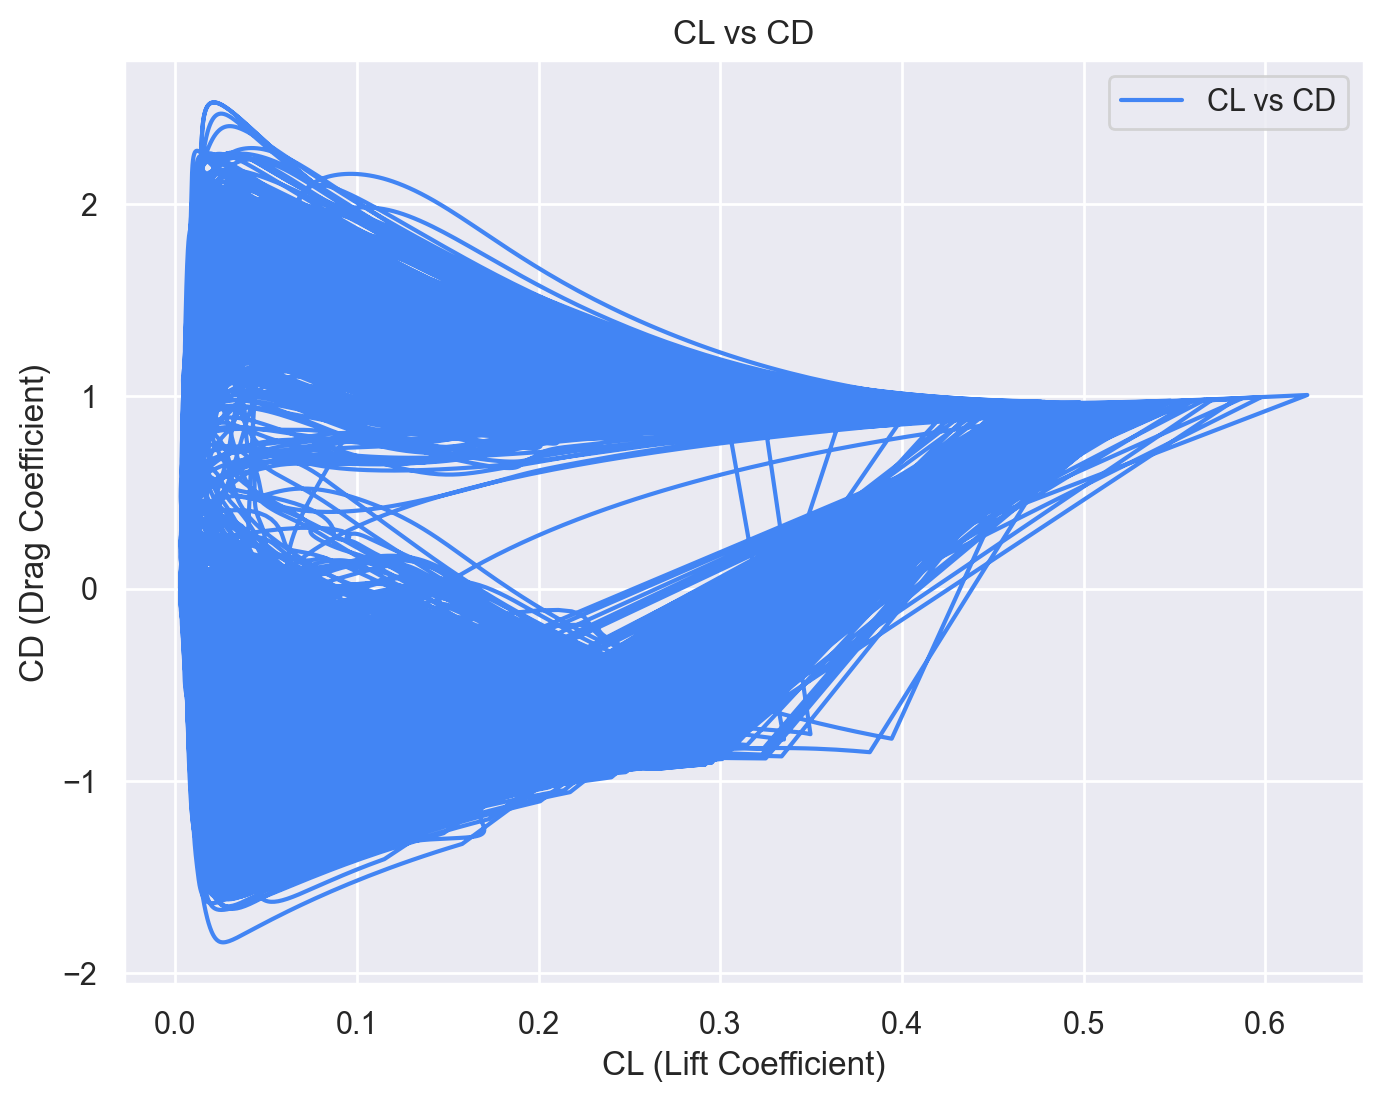

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(df['CD'], df['CL'], label='CL vs CD')
plt.xlabel('CL (Lift Coefficient)')
plt.ylabel('CD (Drag Coefficient)')
plt.title('CL vs CD')
plt.grid(True)
plt.legend()
plt.show()


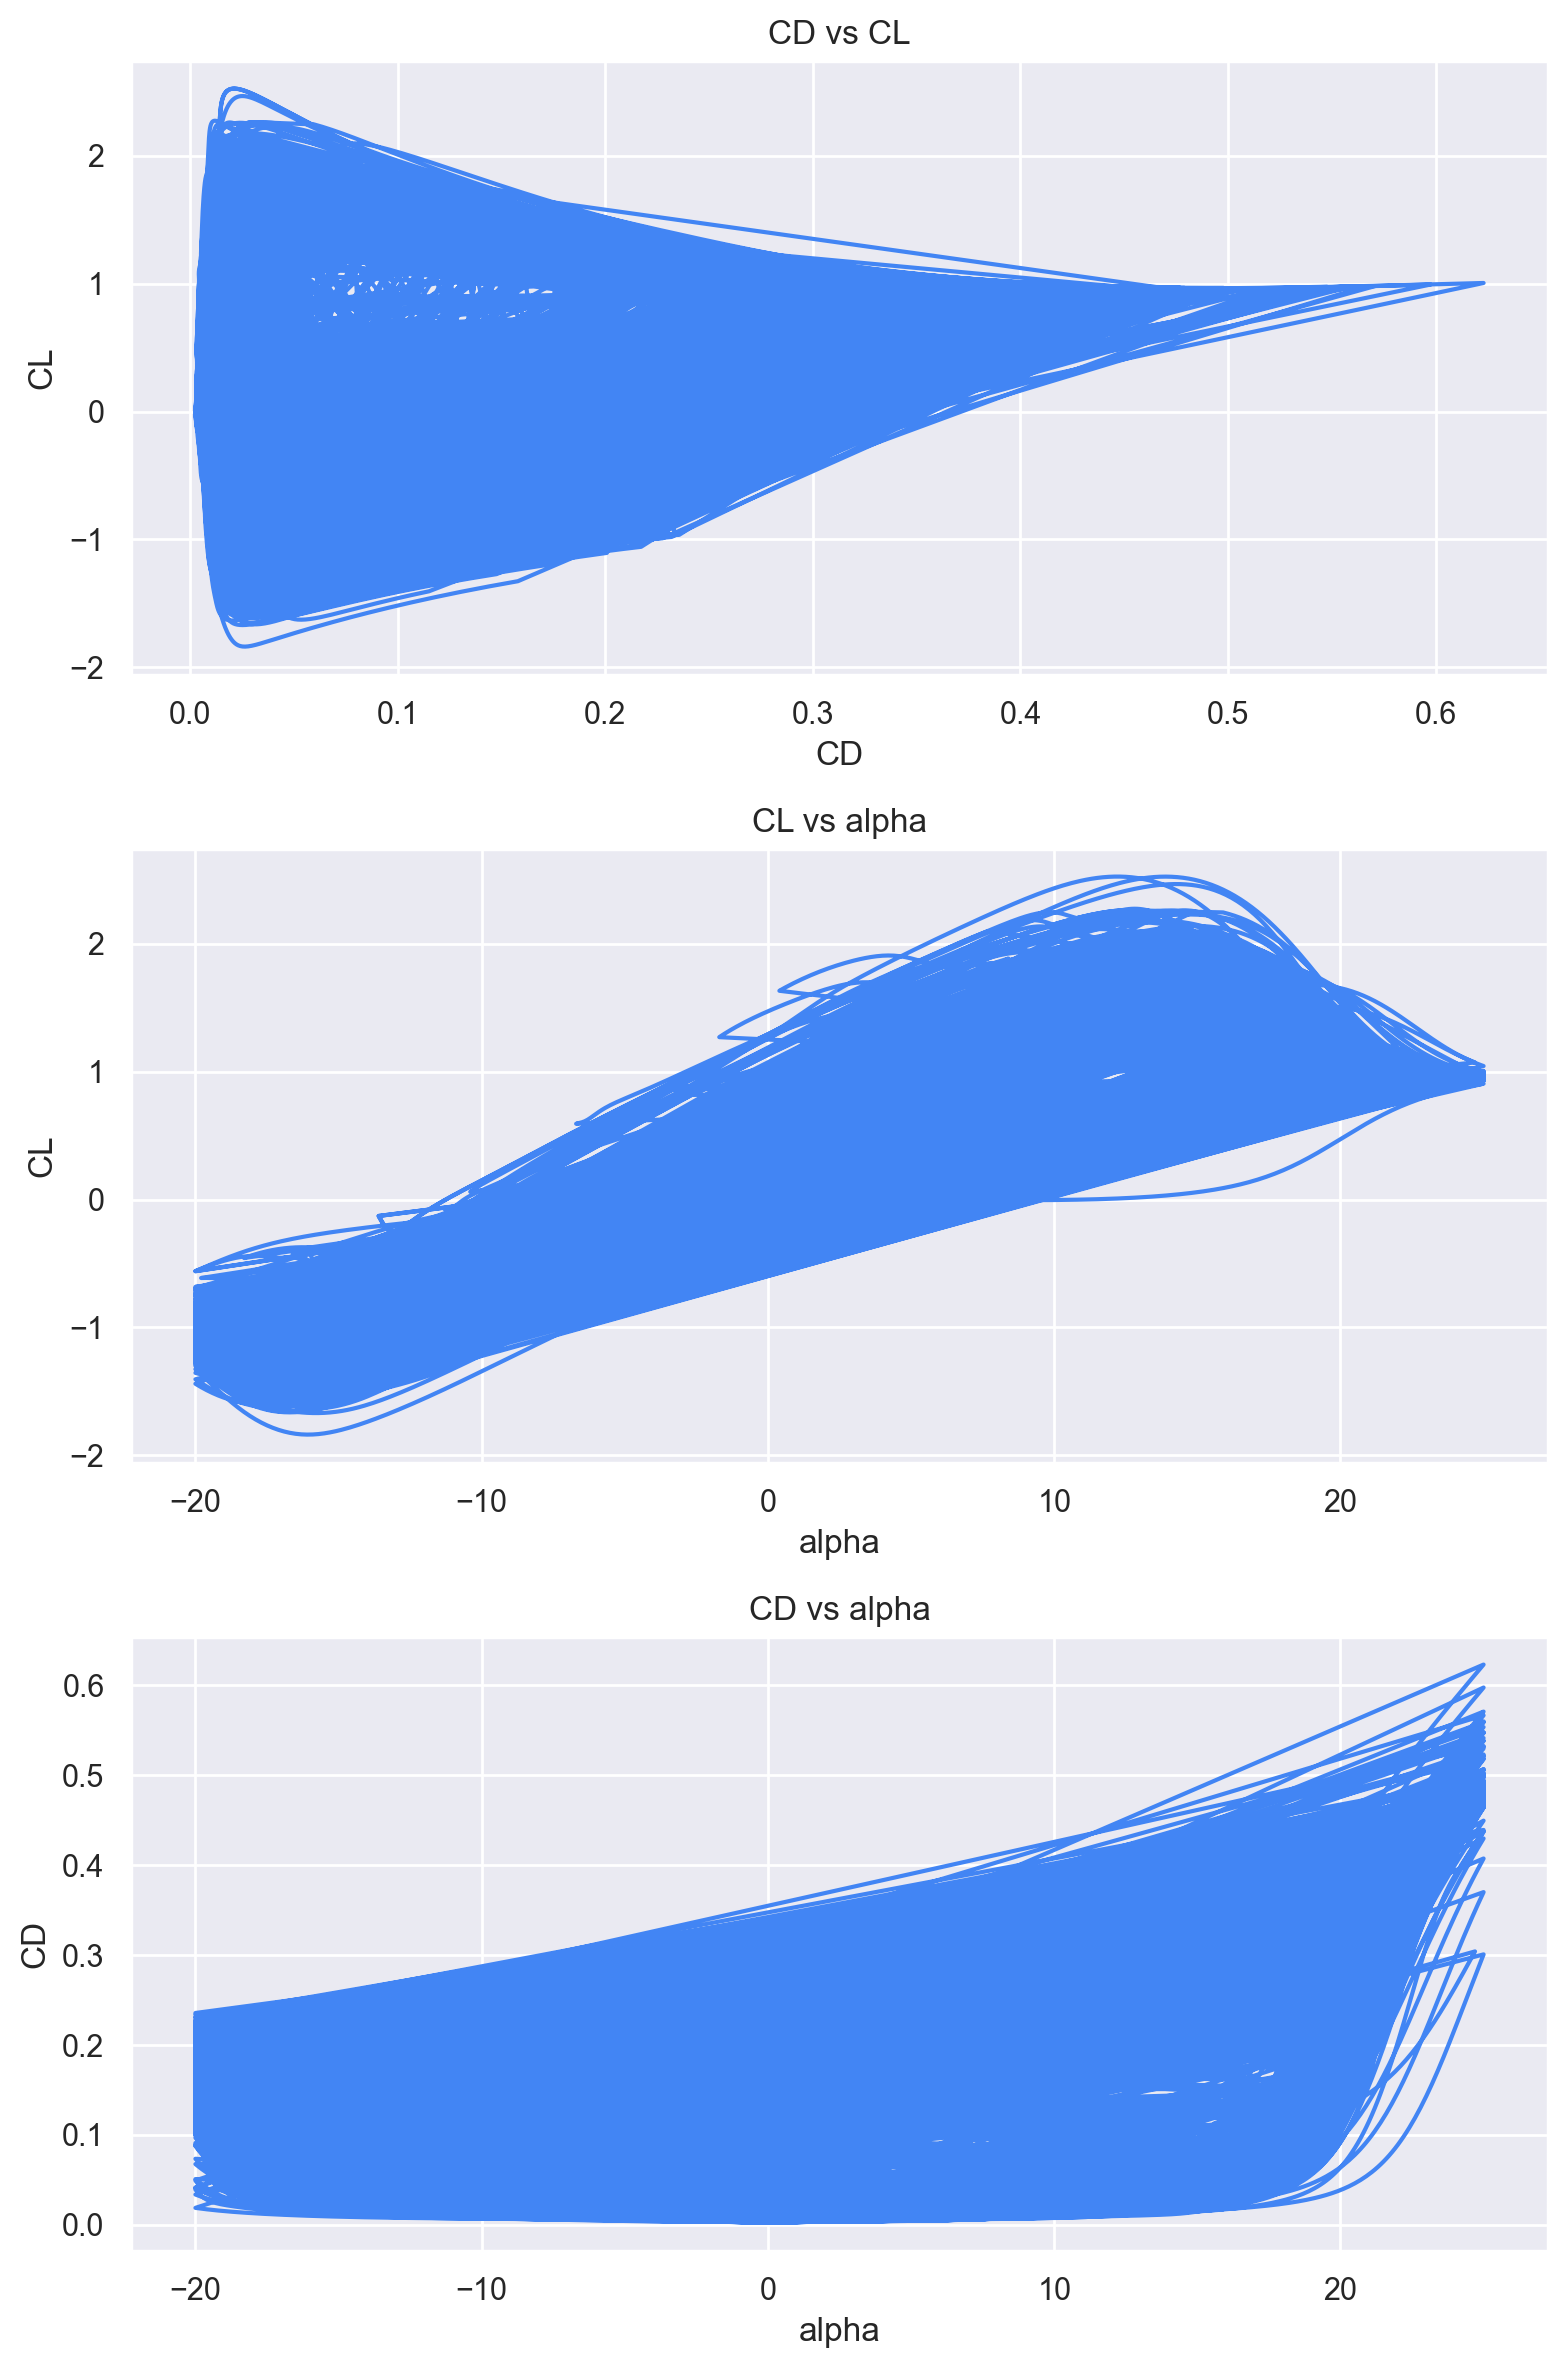

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot CL vs CD
axes[0].plot(filtered_df['CD'], filtered_df['CL'])
axes[0].set_xlabel('CD')
axes[0].set_ylabel('CL')
axes[0].set_title('CD vs CL')

# Plot CL vs alpha
axes[1].plot(filtered_df['alpha'], filtered_df['CL'])
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('CL')
axes[1].set_title('CL vs alpha')

# Plot CD vs alpha
axes[2].plot(filtered_df['alpha'], filtered_df['CD'])
axes[2].set_xlabel('alpha')
axes[2].set_ylabel('CD')
axes[2].set_title('CD vs alpha')


plt.tight_layout()
plt.show()




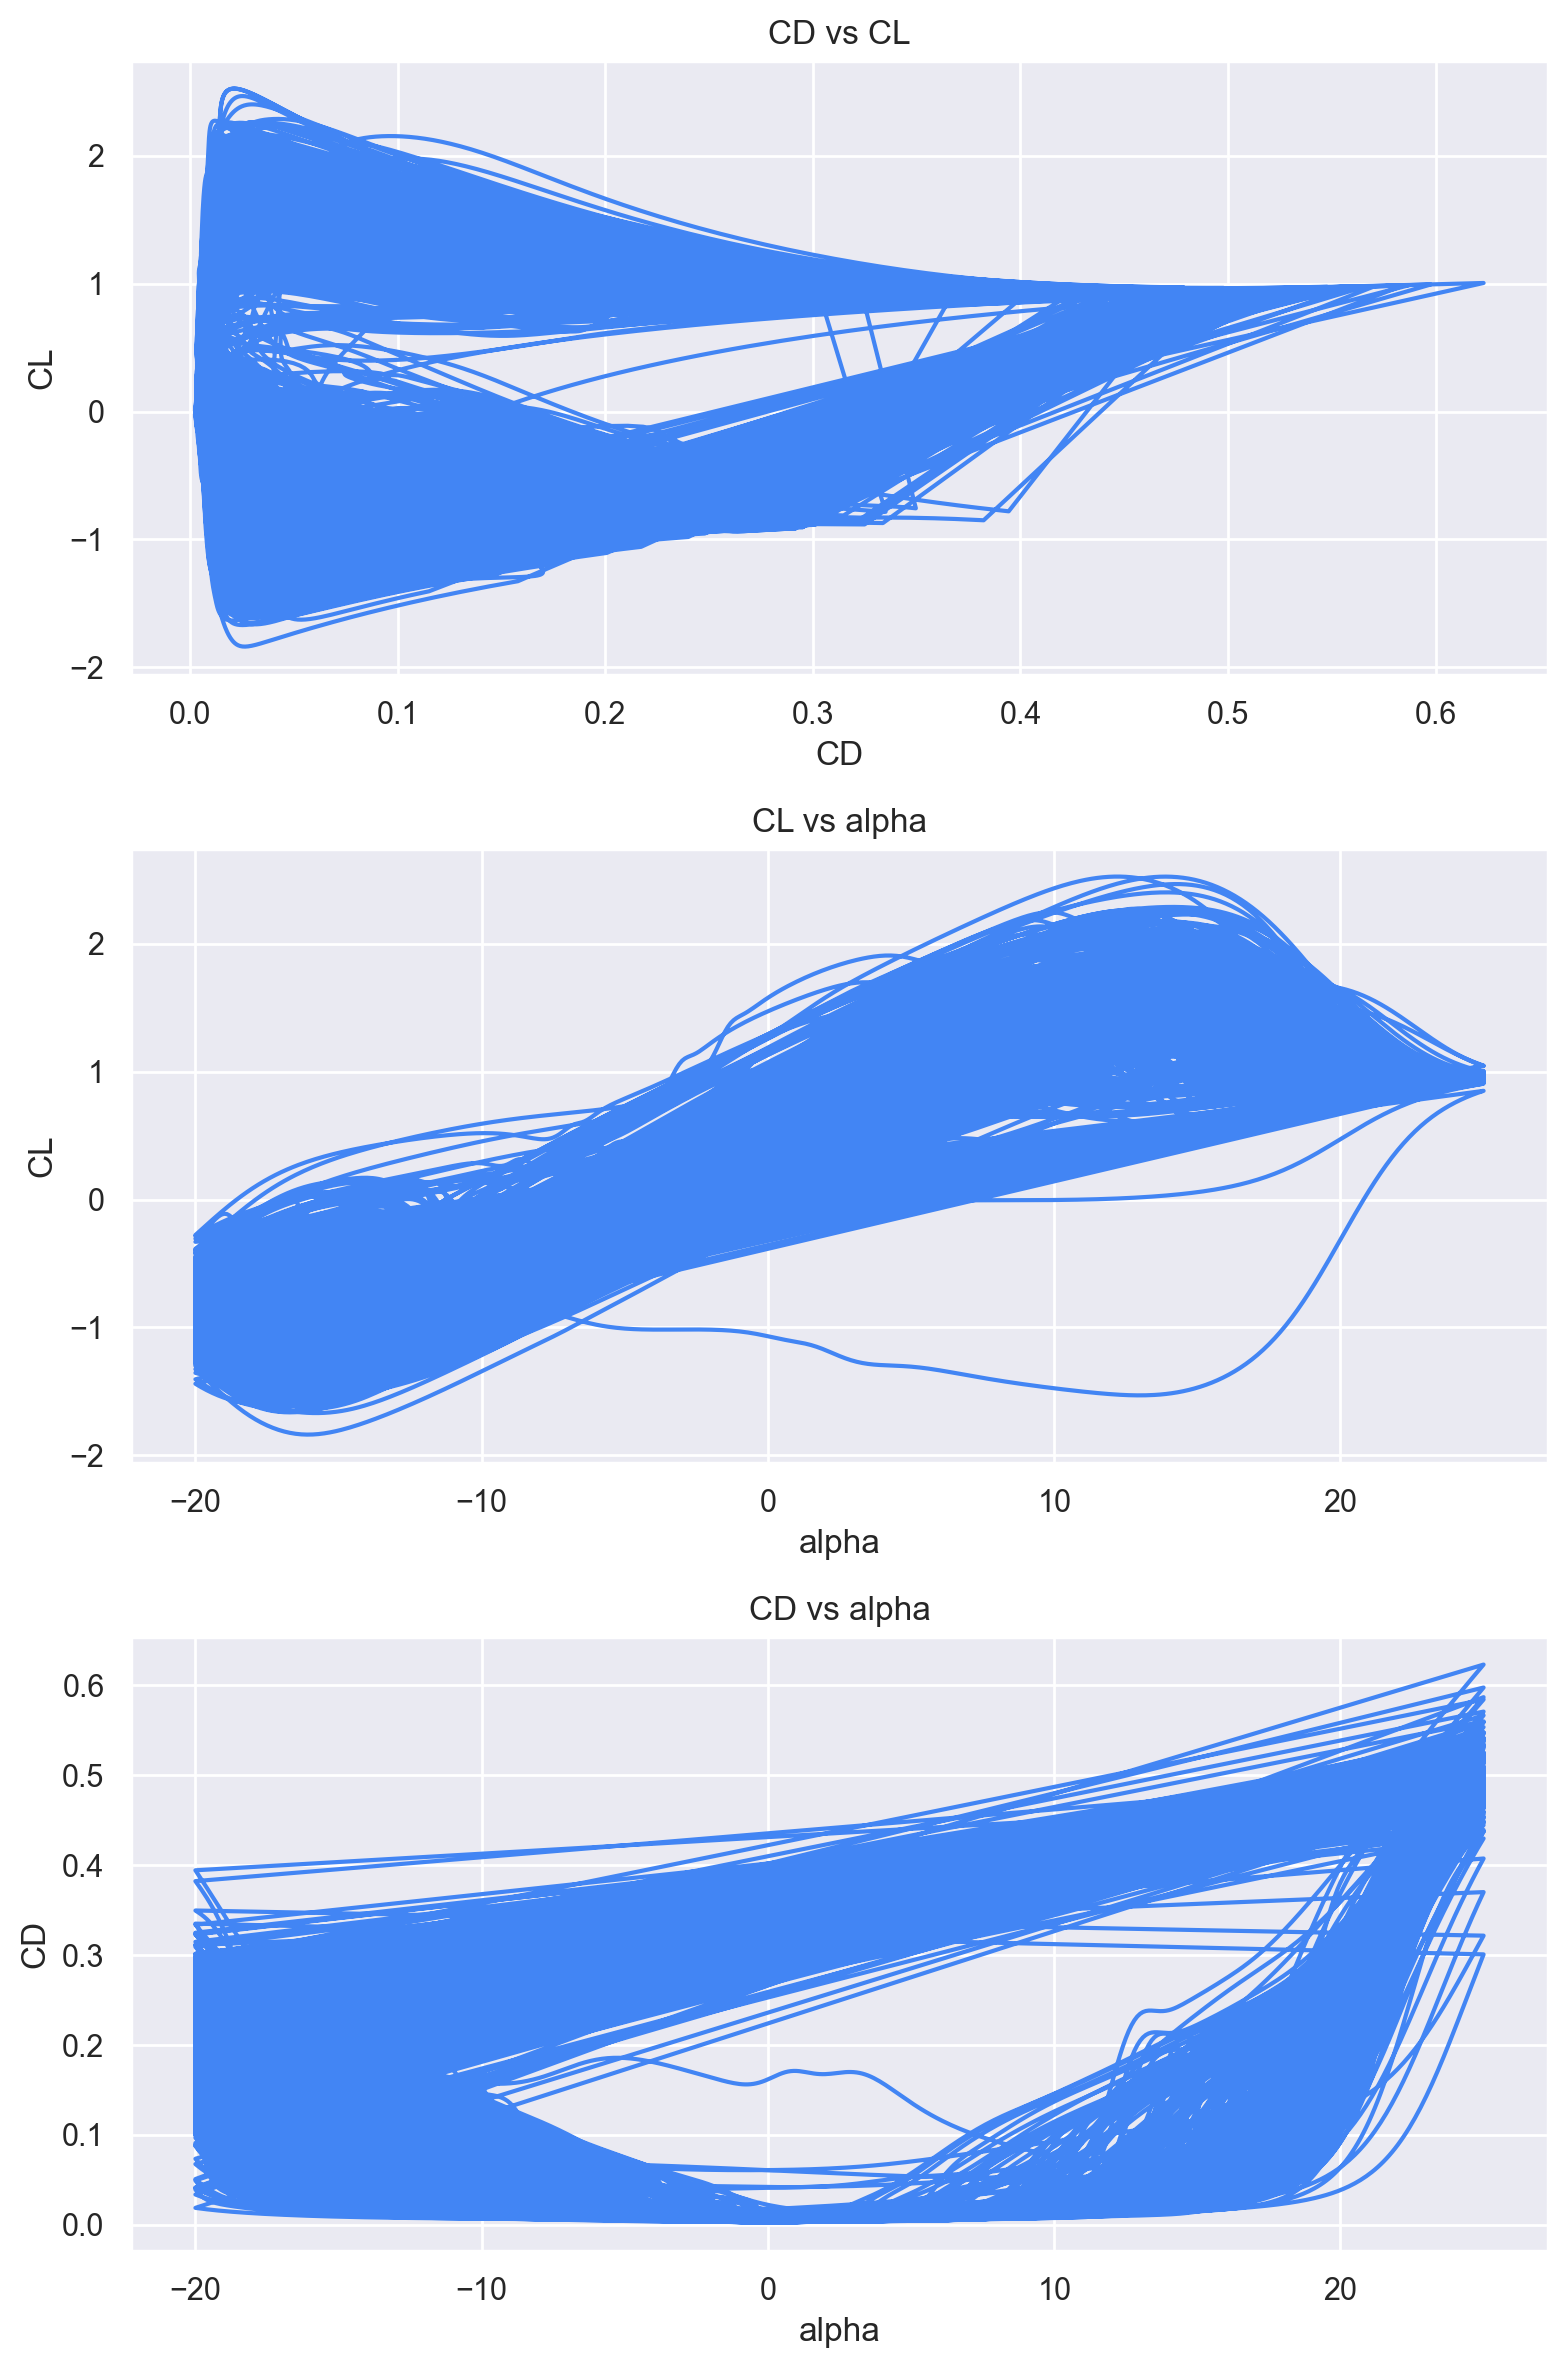

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot CL vs CD
axes[0].plot(df['CD'], df['CL'])
axes[0].set_xlabel('CD')
axes[0].set_ylabel('CL')
axes[0].set_title('CD vs CL')

# Plot CL vs alpha
axes[1].plot(df['alpha'], df['CL'])
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('CL')
axes[1].set_title('CL vs alpha')

# Plot CD vs alpha
axes[2].plot(df['alpha'], df['CD'])
axes[2].set_xlabel('alpha')
axes[2].set_ylabel('CD')
axes[2].set_title('CD vs alpha')


plt.tight_layout()
plt.show()

In [3]:
#DECORATOR FUNCTION TO CALCULATE TIME

import time
from functools import wraps

def process_time(func):
    @wraps(func)
    def timer(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)  # Call the original function with its arguments
        end = time.time()
        print(f"Execution time for {func.__name__}: {end - start:.6f} seconds")
        return result  # Return the result of the original function
    return timer

In [27]:
"""NOT using"""

# #FUNTION TO GET THE FILTERED DATA

# @process_time
# def process_airfoil_data(csv_directory, rule):
#     """
#     Process multiple CSV files containing airfoil data and filters rows based on a specific rule.

#     Args:
#     csv_directory (str): Path to the directory containing CSV files.
#     rule (str): Rule to filter rows (e.g., 'max_cl', 'min_cd', 'high_alpha').

#     Returns:
#     pd.DataFrame: Filtered DataFrame containing rows that satisfy the specified rule across all CSV files.
#     """
#     # Initialize an empty list to store DataFrames of filtered rows
#     filtered_dfs = []

#     # Iterate over each file in the directory
#     for filename in os.listdir(csv_directory):
#         if filename.endswith(".csv"):
#             filepath = os.path.join(csv_directory, filename)
            
#             # Load the CSV file into a DataFrame
#             df = pd.read_csv(filepath)
#             df['alpha']==0
#             df.drop(df[(df['analysis_confidence']<0.85)].index, inplace=True)
#             df['CL/CD']= df['CL'] / df['CD']

#             # Apply the specified rule to filter rows
#             if rule == 'max_cl':
#                 # Filter rows with maximum Cl
#                 max_cl_value = df['CL'].max()
#                 filtered_df = df[df['CL'] == max_cl_value]
            
#             elif rule == 'min_cd':
#                 # Filter rows with minimum Cd
#                 min_cd_value = df['CD'].min()
#                 filtered_df = df[df['CD'] == min_cd_value]
            
#             elif rule == 'min_cd':
#                 # Filter rows with maximun Cl/Cd
#                 max_clcd_ratio = df['CL/CD'].max()
#                 filtered_df = df[df['CL/CD'] == max_clcd_ratio]
            
#             elif rule == 'high_alpha':
#                 # Filter rows with high alpha (angle of attack)
#                 filtered_df = df[df['alpha'] > 15]  # Example: Filter rows with alpha > 15

#             # Append the filtered DataFrame to the list
#             filtered_dfs.append(filtered_df)
            

#     # Concatenate all filtered DataFrames into a single DataFrame
#     result_df = pd.concat(filtered_dfs, ignore_index=True)

#     # Create a new DataFrame to store Cl at alpha = 0 for each airfoil
#     #cl_0 = df[df['alpha'] == 0][['filename', 'CL']].drop_duplicates().rename(columns={'CL': 'CL_0'})

#     # Concat the Cl at alpha = 0 data into the result DataFrame based on airfoil name
#     #result_df = pd.concat([result_df, cl_0], axis=1, sort=False)
    
#     return result_df


# csv_directory = r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\csv"
# #parameter_column = 'alpha'  
# rule = 'max_cl'  

# filtered_data = process_airfoil_data(csv_directory, rule)
# #print(filtered_data)


'NOT using'

In [8]:
@process_time
def process_airfoil_data(csv_directory, rule):
    """
    Process multiple CSV files containing airfoil data and filters rows based on a specific rule.

    Args:
    csv_directory (str): Path to the directory containing CSV files.
    rule (str): Rule to filter rows (e.g., 'max_cl', 'min_cd', 'high_alpha').

    Returns:
    pd.DataFrame: Filtered DataFrame containing rows that satisfy the specified rule across all CSV files.
    """
    # Initialize an empty list to store DataFrames of filtered rows
    filtered_dfs = []

    # Iterate over each file in the directory
    for filename in os.listdir(csv_directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(csv_directory, filename)
            
            # Load the CSV file into a DataFrame
            df = pd.read_csv(filepath)
            df.drop(df[df['analysis_confidence'] < 0.85].index, inplace=True)
            df['CL/CD'] = df['CL'] / df['CD']

            # Apply the specified rule to filter rows
            if rule == 'max_cl':
                # Filter rows with maximum Cl
                max_cl_value = df['CL'].max()
                filtered_df = df[df['CL'] == max_cl_value]
            
            elif rule == 'min_cd':
                # Filter rows with minimum Cd
                min_cd_value = df['CD'].min()
                filtered_df = df[df['CD'] == min_cd_value]
            
            elif rule == 'cl_0':
                # Filter rows with alpha=0 
                filtered_df=df[df['alpha'] == 0]
                
            elif rule == 'max_clcd':
                # Filter rows with maximum Cl/Cd
                max_clcd_ratio = df['CL/CD'].max()
                filtered_df = df[df['CL/CD'] == max_clcd_ratio]
            
            elif rule == 'high_alpha':
                # Filter rows with high alpha (angle of attack)
                filtered_df = df[df['alpha'] > 15]  # Example: Filter rows with alpha > 15

            # Append the filtered DataFrame to the list
            filtered_dfs.append(filtered_df)

    # Concatenate all filtered DataFrames into a single DataFrame
    result_df = pd.concat(filtered_dfs, ignore_index=True)

    return result_df

# Example usage:
csv_directory = r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\csv_663000"
rule = 'max_clcd'

filtered_data = process_airfoil_data(csv_directory, rule)
#print(filtered_data)


Execution time for process_airfoil_data: 54.071638 seconds


In [9]:
filtered_data.value_counts()

filename   analysis_confidence  alpha  CL        CD        CM         Cpmin      Top_Xtr   Bot_Xtr   mach_crit  CL/CD     
2032c-il   0.914543             6.1    1.367413  0.011938  -0.128569  -2.192443  0.268660  0.994266  0.446120   114.539742    1
mh18-il    0.959171             5.4    0.865216  0.007817  -0.042438  -1.473127  0.465217  0.994165  0.514181   110.689847    1
mh30-il    0.957309             3.4    0.586271  0.006507  -0.043690  -1.129104  0.444596  0.992702  0.560533   90.103049     1
mh27-il    0.906759             3.5    0.644596  0.008625  -0.050418  -1.092081  0.655284  0.967256  0.566338   74.736109     1
mh26-il    0.926337             3.5    0.634467  0.008091  -0.048561  -1.139196  0.609254  0.969840  0.558982   78.412645     1
                                                                                                                             ..
goe123-il  0.930892             3.5    0.948451  0.007050  -0.112505  -1.191517  0.510636  0.992467  0.551154

In [10]:
filtered_data.head()

,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
0,2032c-il,0.914543,6.1,1.367413,0.011938,-0.128569,-2.192443,0.268660,0.994266,0.446120,114.539742
1,a18-il,0.964323,2.4,0.860499,0.007065,-0.118081,-1.258135,0.555265,0.993329,0.541664,121.795612
2,a18sm-il,0.964971,3.3,0.849789,0.006981,-0.115325,-1.311254,0.563994,0.992455,0.534452,121.728086
3,a63a108c-il,0.975926,7.6,0.849233,0.014685,-0.000468,-3.893740,0.028537,1.006525,0.354777,57.830439
4,ag03-il,0.958470,5.4,0.780611,0.009394,-0.030292,-2.028233,0.136502,1.000097,0.459226,83.094149


In [11]:
filtered_data.tail()

,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
1609,wb13535sm-il,0.943947,3.7,0.837982,0.007984,-0.091707,-1.369427,0.459024,1.007462,0.526885,104.953767
1610,wb140-il,0.967024,3.9,0.861625,0.007479,-0.094076,-1.339081,0.564737,0.997014,0.530790,115.205046
1611,whitcomb-il,0.963472,6.5,1.090979,0.017999,-0.109208,-3.942696,0.029821,0.679287,0.352916,60.612284
1612,ys915-il,0.917293,2.2,0.526310,0.005608,-0.078089,-0.891073,0.849211,0.992451,0.601540,93.847990
1613,ys930-il,0.949250,2.8,0.733099,0.005626,-0.112298,-1.069251,0.775494,1.001672,0.570013,130.306265


In [12]:
max_five=filtered_data.nlargest(10, 'CL')['CL'].tolist()
top_five_score=filtered_data[filtered_data['CL'].isin(max_five)]
top_five_score

,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
441,fx72150a-il,0.958180,7.3,1.779308,0.013085,-0.225058,-2.156866,0.519275,0.982752,0.448863,135.976321
442,fx72150b-il,0.950277,6.6,1.847457,0.013961,-0.258377,-2.262788,0.537492,0.947427,0.440843,132.333501
454,fx74cl5140-il,0.969483,5.4,1.786007,0.015094,-0.247461,-2.514978,0.418503,0.960117,0.423371,118.323021
469,fx77w270-il,0.975529,11.9,1.908615,0.022288,-0.112374,-3.406344,0.378994,0.720523,0.375064,85.633149
740,goe462-il,0.850377,6.9,1.797632,0.019215,-0.185892,-3.143848,0.245085,0.210331,0.387539,93.552057
982,jn153-il,0.950754,10.9,2.020761,0.016574,-0.151031,-3.152555,0.433834,1.005415,0.387105,121.925709
998,kenmar-il,0.914070,8.5,1.921251,0.025262,-0.217520,-3.289781,0.425531,0.688307,0.380453,76.054270
1051,marsden-il,0.914948,6.8,1.919806,0.025222,-0.217716,-3.287282,0.425556,0.688114,0.380571,76.116357
1385,s1223-il,0.953439,5.8,1.827203,0.016185,-0.267949,-2.419559,0.336416,0.979249,0.429732,112.893526
1386,s1223rtl-il,0.947864,6.4,1.804654,0.018937,-0.241578,-2.823496,0.271425,0.941019,0.404599,95.298536


In [13]:
#NORMALIZING OUR FILTERED DATA FOR REDUCING THE BAISENESS OF HIGH VALUES/ NEGATIVE VALUES DURING SCORING

from sklearn.preprocessing import MinMaxScaler

def normalize_aerodynamic_data(data):
    """
    Normalize aerodynamic data using Min-Max scaling to the range [0, 1].

    Args:
        data (pd.DataFrame): DataFrame containing aerodynamic data.

    Returns:
        pd.DataFrame: Normalized DataFrame.
    """
    # Extract numerical columns to be normalized
    numerical_columns = ['alpha', 'CL', 'CD', 'CM', 'Cpmin', 'Top_Xtr', 'Bot_Xtr', 'mach_crit', 'CL/CD']

    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()

    # Fit and transform the scaler on numerical columns
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    return data

# Assuming 'filtered_data' is your DataFrame containing aerodynamic data
normalized_data = normalize_aerodynamic_data(filtered_data)

# Display the normalized DataFrame
print("Normalized Aerodynamic Data:")
print(normalized_data)


Normalized Aerodynamic Data:
          filename  analysis_confidence     alpha        CL        CD  \
0         2032c-il             0.914543  0.595890  0.729914  0.018001   
1           a18-il             0.964323  0.511416  0.520362  0.006421   
2         a18sm-il             0.964971  0.531963  0.515935  0.006221   
3      a63a108c-il             0.975926  0.630137  0.515705  0.024528   
4          ag03-il             0.958470  0.579909  0.487337  0.011956   
...            ...                  ...       ...       ...       ...   
1609  wb13535sm-il             0.943947  0.541096  0.511054  0.008605   
1610      wb140-il             0.967024  0.545662  0.520827  0.007404   
1611   whitcomb-il             0.963472  0.605023  0.615639  0.032405   
1612      ys915-il             0.917293  0.506849  0.382212  0.002958   
1613      ys930-il             0.949250  0.520548  0.467696  0.003001   

            CM     Cpmin   Top_Xtr   Bot_Xtr  mach_crit     CL/CD  
0     0.456107  0.545767  

In [14]:
normalized_data.head()

,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
0,2032c-il,0.914543,0.595890,0.729914,0.018001,0.456107,0.545767,0.261414,0.956087,0.257220,0.595634
1,a18-il,0.964323,0.511416,0.520362,0.006421,0.485822,0.770877,0.541726,0.955151,0.478301,0.632490
2,a18sm-il,0.964971,0.531963,0.515935,0.006221,0.493629,0.758078,0.550263,0.954279,0.461612,0.632147
3,a63a108c-il,0.975926,0.630137,0.515705,0.024528,0.819040,0.135861,0.026564,0.968321,0.045863,0.307578
4,ag03-il,0.958470,0.579909,0.487337,0.011956,0.734544,0.585332,0.132158,0.961906,0.287548,0.435905


In [11]:
max_five=normalized_data.nlargest(10, 'CL')['CL'].tolist()
top_five_score=normalized_data[normalized_data['CL'].isin(max_five)]
top_five_score

,filename,analysis_confidence,alpha,CL,CD,CM,Cpmin,Top_Xtr,Bot_Xtr,mach_crit,CL/CD
67,ah93w480b-il,0.888541,0.564576,0.821420,0.148927,0.398406,0.562385,0.389344,0.935527,0.238563,0.106712
447,fx73cl2152-il,0.933428,0.416974,0.820914,0.017725,0.373493,0.548737,0.302003,0.879651,0.229223,0.719334
468,fx77w258-il,0.983114,0.553506,0.813781,0.020349,0.616022,0.441663,0.338343,0.636853,0.165131,0.643901
469,fx77w270-il,0.981683,0.590406,0.905792,0.027846,0.553876,0.391679,0.340853,0.647178,0.139754,0.558640
471,fx77w343-il,0.981573,0.509225,0.826332,0.026923,0.551517,0.385572,0.371670,0.621307,0.136817,0.525030
975,jn153-il,0.939807,0.516605,0.907746,0.014700,0.483836,0.475625,0.389572,0.971154,0.183880,0.904883
991,kenmar-il,0.964368,0.505535,0.997070,0.027685,0.322878,0.386180,0.436267,0.635984,0.137108,0.616417
1042,marsden-il,0.964204,0.446494,1.000000,0.027761,0.323246,0.384640,0.436458,0.636319,0.136371,0.616809
1376,s1223-il,0.946094,0.332103,0.815368,0.019570,0.250752,0.609324,0.320226,0.589893,0.273195,0.664300
1377,s1223rtl-il,0.889438,0.420664,0.890060,0.025417,0.308462,0.475150,0.262774,0.884691,0.183609,0.591048


In [15]:
@process_time
def airfoil_score(filtered_data, weights):
    """
    Calculate a score for each airfoil based on aerodynamic parameters and user-defined weights.

    Args:
        filtered_data (pd.DataFrame): DataFrame containing filtered aerodynamic data for airfoils.
        weights (dict): Dictionary of parameter weights provided by the user.

    Returns:
        pd.DataFrame: DataFrame containing scores for each airfoil.
    """
    airfoil_scores = {}  # Dictionary to store scores for each airfoil
    
    # Iterate over each airfoil in the filtered DataFrame
    for airfoil, group_df in filtered_data.groupby('filename'):
        # Calculate the score for the current airfoil based on weighted sum of parameters
        score = (
            group_df['CL'] * weights['w1'] +
            group_df['CD'] * weights['w2'] +
            group_df['CM'] * weights['w3'] +
            group_df['alpha'] * weights['w4'] +
            group_df['CL/CD'] * weights['w5']
            # Add more parameters as needed (e.g., thickness) with corresponding weights
        ).sum()

        # Store the calculated score in the dictionary with airfoil name as key
        airfoil_scores[airfoil] = score

    # Create a DataFrame from the dictionary with airfoil scores
    scores_df = pd.DataFrame(list(airfoil_scores.items()), columns=['Airfoil', 'Score'])

    return scores_df

# Example usage:
# Define example weights (adjust these according to your preferences)
weights = {
    'w1': 0, #CL
    'w2': 0, #CD
    'w3': 0, #CM
    'w4': 0, #alpha
    'w5': 1.0 #CL/CD
}

# Assuming 'filtered_data' is your DataFrame containing filtered aerodynamic data
# Call the function to calculate scores for each airfoil
scores_df = airfoil_score(normalized_data, weights)

# Display the calculated scores DataFrame
print("Airfoil Scores DataFrame:")
print(scores_df)


Execution time for airfoil_score: 4.634259 seconds
Airfoil Scores DataFrame:
           Airfoil     Score
0         2032c-il  0.595634
1           a18-il  0.632490
2         a18sm-il  0.632147
3      a63a108c-il  0.307578
4          ag03-il  0.435905
...            ...       ...
1609  wb13535sm-il  0.546942
1610      wb140-il  0.599013
1611   whitcomb-il  0.321709
1612      ys915-il  0.490530
1613      ys930-il  0.675720

[1614 rows x 2 columns]


In [16]:
scores_df

,Airfoil,Score
0,2032c-il,0.595634
1,a18-il,0.632490
2,a18sm-il,0.632147
3,a63a108c-il,0.307578
4,ag03-il,0.435905
...,...,...
1609,wb13535sm-il,0.546942
1610,wb140-il,0.599013
1611,whitcomb-il,0.321709
1612,ys915-il,0.490530


In [19]:
Top15=scores_df.nlargest(15, 'Score')['Score'].tolist()
top_score=scores_df[scores_df['Score'].isin(Top15)]
top_score

,Airfoil,Score
37,ah7476-il,0.852779
39,ah79100b-il,0.833703
40,ah79100c-il,0.852960
264,e471-il,0.860773
298,e58-il,0.984934
305,e59-il,0.937649
311,e61-il,0.958918
312,e62-il,0.877432
314,e63-il,0.921395
335,e71-il,0.882859


In [37]:
scores_df.head()

,Airfoil,Score
0,2032c-il,0.653426
1,a18-il,0.538147
2,a18sm-il,0.545018
3,a63a108c-il,0.385653
4,ag03-il,0.442430


In [39]:
# top_20 = scores_df.nlargest(20, 'Score', keep='all')
# max_score = top_20_descending.sort_values(by='Score', ascending=True)
# print(max_score)


NameError: name 'top_20_descending' is not defined

In [40]:
max_20=scores_df.nlargest(20, 'Score')['Score'].tolist()
top_score=scores_df[scores_df['Score'].isin(max_20)]
top_score

,Airfoil,Score
68,ah94145-il,0.889933
71,ah95160-il,0.883603
121,ch10sm-il,0.909798
148,dae11-il,0.901538
168,drgnfly-il,0.885037
299,e58-il,0.908403
312,e61-il,0.854933
441,fx72150a-il,0.874037
442,fx72150b-il,0.861935
443,fx72ls160-il,1.000000


In [ ]:
# plt.figure(figsize=(8, 6))
# plt.plot(df1['CL'], df1['CD'], label='CL vs CD')
# plt.xlabel('CL (Lift Coefficient)')
# plt.ylabel('CD (Drag Coefficient)')
# plt.title('CL vs CD')
# plt.grid(True)
# plt.legend()
# plt.show()


fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot CL vs CD
axes[0].plot(df1['CD'], df1['CL'])
axes[0].set_xlabel('CD')
axes[0].set_ylabel('CL')
axes[0].set_title('CD vs CL')

# Plot CL vs alpha
axes[1].plot(df1['alpha'], df1['CL'])
axes[1].set_xlabel('alpha')
axes[1].set_ylabel('CL')
axes[1].set_title('CL vs alpha')

# Plot CD vs alpha
axes[2].plot(df1['alpha'], df1['CD'])
axes[2].set_xlabel('alpha')
axes[2].set_ylabel('CD')
axes[2].set_title('CD vs alpha')


plt.tight_layout()
plt.show()


In [ ]:
af = asb.Airfoil(r"C:\Users\shrey\OneDrive\Desktop\Phinal year project\scrapping\airfoil dat files\new\fx63137-il.dat")

alpha = np.linspace(-20, 25,451)
re = np.geomspace(1e4, 1e8, 5)
a
Alpha, Re = np.meshgrid(alpha, re)

aero_flattened = af.get_aero_from_neuralfoil(
    alpha=Alpha.flatten(),
    Re=Re.flatten(),
    mach=0,
    model_size="xxxlarge",
)
Aero = {
    key: value.reshape(Alpha.shape)
    for key, value in aero_flattened.items()
}

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from aerosandbox.tools.string_formatting import eng_string

fig, ax = plt.subplots()
colors = LinearSegmentedColormap.from_list(
    "custom_cmap",
    colors=[
        p.adjust_lightness(c, 0.8) for c in
        ["orange", "darkseagreen", "dodgerblue"]
    ]
)(np.linspace(0, 1, len(re)))

for i in range(len(re)):
    line, = ax.plot(
        Aero["CD"][i, :],
        Aero["CL"][i, :],
        color=colors[i], alpha=0.8,
    )

    plt.annotate(
        f" $Re = \\mathrm{{{eng_string(re[i])}}}$",
        xy=(line.get_xdata()[-1], line.get_ydata()[-1]),
        color=colors[i],
        ha="left", va="center", fontsize=10
    )

afax = ax.inset_axes([0.76, 0.802, 0.23, 0.23])
afax.fill(
    af.x(), af.y(),
    facecolor=(0, 0, 0, 0.2), linewidth=1, edgecolor=(0, 0, 0, 0.7)
)
afax.annotate(
    text=f"{af.name} Airfoil\n",
    xy=(0.5, 0),
    ha="center", va="bottom", fontsize=10,
    alpha=0.7
)
afax.axis('off')
afax.axis('equal')

plt.xscale('log')
p.show_plot(
    title=f"$C_L$-$C_D$ Polar for {af.name} Airfoil",
    xlabel="Drag Coefficient $C_D$",
    ylabel="Lift Coefficient $C_L$",
)